## Shang_Danqin _SVM_inClass

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### import data

In [2]:
import os
os.chdir("C:\\Users\shang\Desktop\Python\Social_Network_Ads")
data = pd.read_csv("Social_Network_Ads.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 15.7+ KB


In [4]:
data.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [5]:
data.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


User ID is not an relevant varibale to predict Purchased, so I will delete it.

In [6]:
del data['User ID']

### Data Visualization

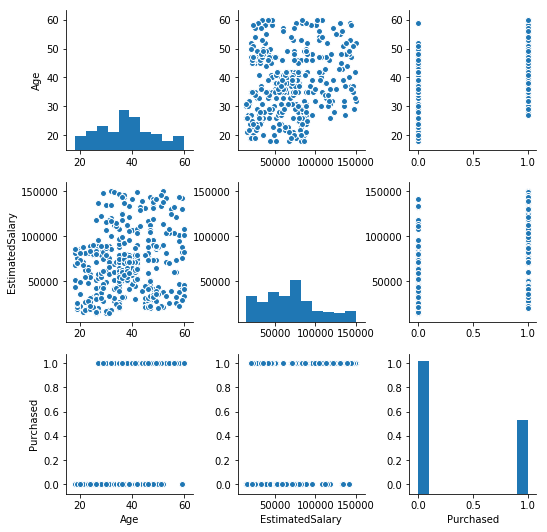

In [7]:
sns.pairplot(data)

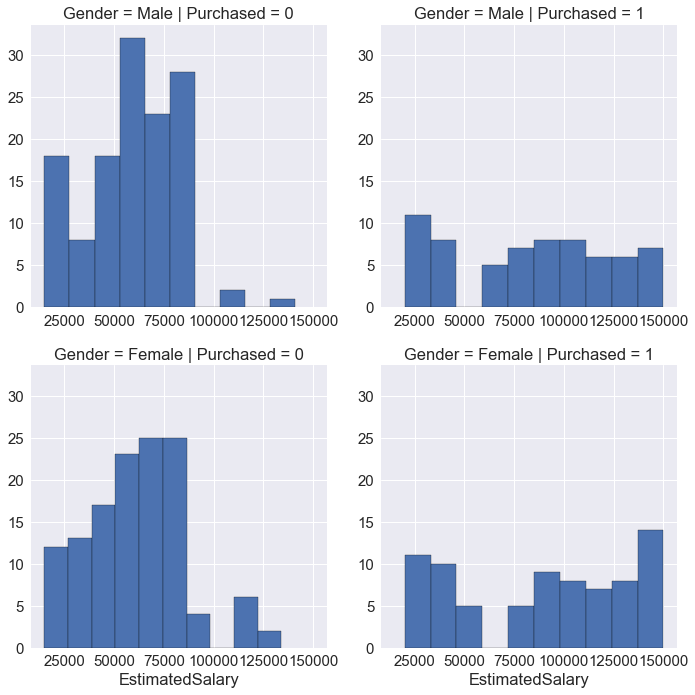

In [8]:
sns.set_style("whitegrid")
plt.rcParams["patch.force_edgecolor"] = True
sns.set(font_scale = 1.5)
g = sns.FacetGrid(data, col="Purchased", row="Gender",size=5)
g.map(plt.hist, "EstimatedSalary")

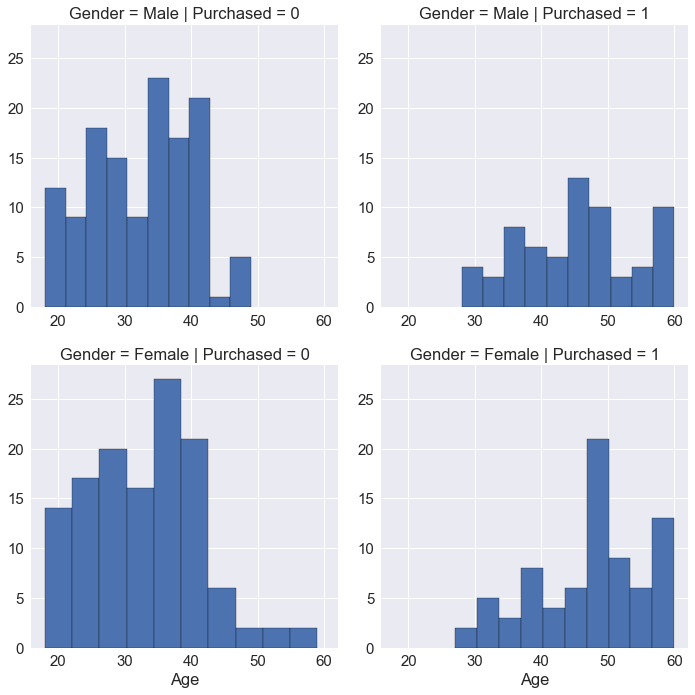

In [9]:
sns.set_style("whitegrid")
plt.rcParams["patch.force_edgecolor"] = True
sns.set(font_scale = 1.5)
g = sns.FacetGrid(data, col="Purchased", row="Gender",size=5)
g.map(plt.hist, "Age")

### Train Test Seperate

In [10]:
data['Gender'].replace(['Female','Male'],[0,1],inplace=True) #Convert Object to Int 

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
Gender             400 non-null int64
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4)
memory usage: 12.6 KB


In [12]:
X = data.drop('Purchased',axis=1)
X.head()

,Gender,Age,EstimatedSalary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, data['Purchased'], test_size = 0.25, random_state = 0)

### Train the Support Vector Classifier

In [14]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### Predictions and Evaluations

In [15]:
predictions = model.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print('\033[1m'+ 'Confusion Matrix')
print('\033[0m',confusion_matrix(y_test, predictions))

Confusion Matrix
 [[67  1]
 [25  7]]


In [16]:
print('\033[1m'+'Classification Report')
print('\033[0m',classification_report(y_test, predictions))

Classification Report
              precision    recall  f1-score   support

          0       0.73      0.99      0.84        68
          1       0.88      0.22      0.35        32

avg / total       0.78      0.74      0.68       100



### Gridsearch

In [17]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

In [18]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=5)
grid.fit(X_train,y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ........... C=0.1, gamma=1, kernel=rbf, score=0.63, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ........... C=0.1, gamma=1, kernel=rbf, score=0.63, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ........... C=0.1, gamma=1, kernel=rbf, score=0.63, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ......... C=0.1, gamma=0.1, kernel=rbf, score=0.63, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ......... C=0.1, gamma=0.1, kernel=rbf, score=0.63, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ......... C=0.1, gamma=0.1, kernel=rbf, score=0.63, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ........ C=

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s



[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] .......... C=1, gamma=0.001, kernel=rbf, score=0.7, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] ......... C=1, gamma=0.0001, kernel=rbf, score=0.6, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] ........ C=1, gamma=0.0001, kernel=rbf, score=0.65, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] ........ C=1, gamma=0.0001, kernel=rbf, score=0.66, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ............ C=10, gamma=1, kernel=rbf, score=0.65, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ............ C=10, gamma=1, kernel=rbf, score=0.63, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ............ C=10, gamma=1, kernel=rbf, score=0.65, total=   0.0s
[CV] 

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.5s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=5)

In [19]:
grid.best_params_

{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}

In [20]:
grid.best_estimator_

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [21]:
grid_predictions = grid.predict(X_test)
print('\033[1m'+ 'Confusion Matrix')
print('\033[0m',confusion_matrix(y_test, grid_predictions))

Confusion Matrix
 [[65  3]
 [15 17]]


In [22]:
print('\033[1m'+'Classification Report')
print('\033[0m',classification_report(y_test, grid_predictions))

Classification Report
              precision    recall  f1-score   support

          0       0.81      0.96      0.88        68
          1       0.85      0.53      0.65        32

avg / total       0.82      0.82      0.81       100

